# Regressão

Em regressão, queremos prever um valor contínuo, como o preço de um imóvel, a altura de uma pessoa, a receita de um jogo no primeiro mês de lançamento e etc.

Basicamente todas as técnicas estudadas até aqui de cross-validation, otimização de hiperparâmetros e feature selection, também servem para problemas de regressão.

A grande diferença entre regressão e classificação é o tipo de dados que queremos prever e as métricas utilizadas para avaliarmos a performance.

Iremos usar o dataset de previsão de preços de casas disponível no kaggle ([House Prices: Advanced Regression Tecniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

Sugiro fortemente como leitura complementar explorar os notebooks dessa competição e aprender com os competidores e quem sabe até participar da competição!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregando os dados

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datasets/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
# selecionando o target
target = 'SalePrice'

# construindo uma lista com os nomes apenas das variáveis categóricas
cat_vars = df.select_dtypes(include='object').columns.to_list()

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df.columns if col not in cat_vars + ['Id', target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X = df.filter(num_vars).copy()
y = df['SalePrice'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [ ]:
y_train.head()

327     145250
1061     81000
161     412500
109     190000
973     182000
Name: SalePrice, dtype: int64

## Aplicando a Regressão Linear Múltipla

In [ ]:
# instalando o pacote feature-engine
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(imputation_method="median", variables=num_vars)),
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('lr', LinearRegression())
])

In [ ]:
model.fit(X_train, y_train)
y_previsto = model.predict(X_test)
y_esperado = y_test.copy()

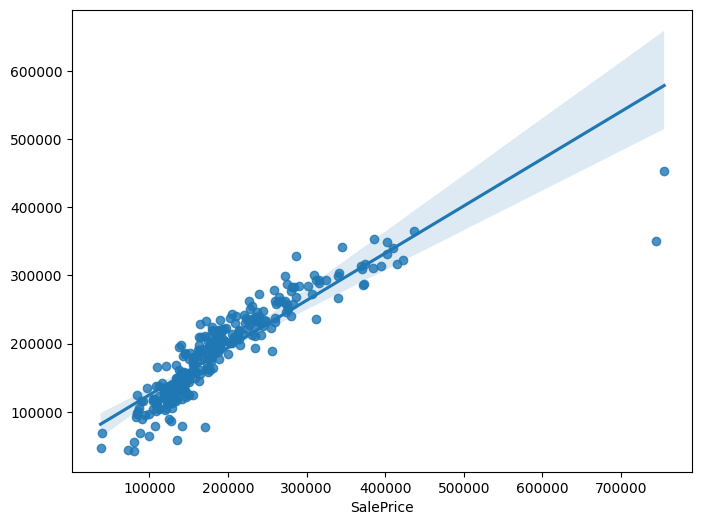

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x=y_esperado, y=y_previsto, ax=ax);

## Computando as Métricas
- R2 e R2 Ajustado
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- RMSLE (Root Mean Squared Logarithmic Error)
- Max Error
- MedAE (Median Absolute Percentage Error)
- MAPE (Mean Absolute Percentage Error)






Como vimos, algumas dessas métricas são afetadas por outliers, então vamos testar com e sem outliers.

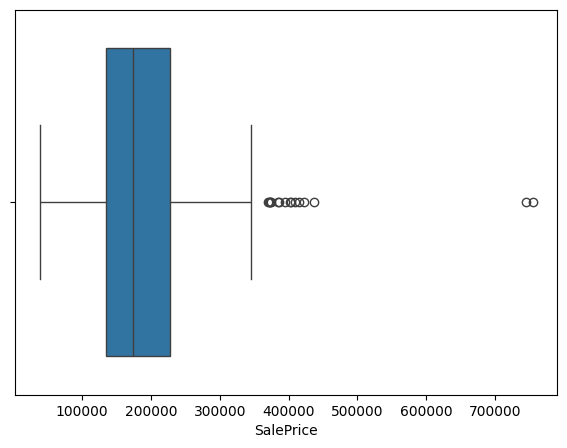

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_esperado);

In [ ]:
# Vamos remover valores maiores que 340000
y_esperado_sem_outlier = y_esperado[y_esperado < 340000]
y_previsto_sem_outlier = y_previsto[y_esperado < 340000]

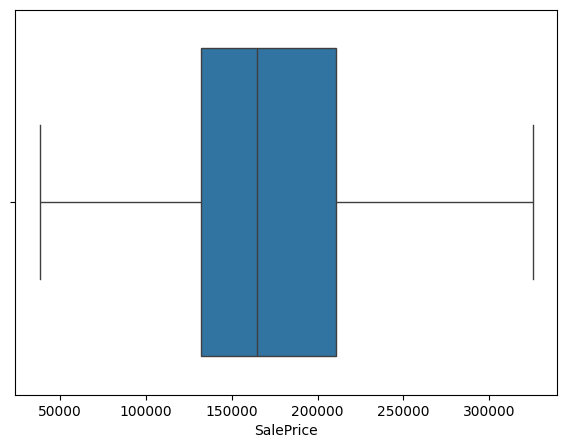

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_esperado_sem_outlier);

### R2 e R2 Ajustado

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_esperado, y_previsto)
r2_sem_outliers = r2_score(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('R2 COM outliers:', r2)
print('R2 SEM outliers:', r2_sem_outliers)

R2 COM outliers: 0.7888566462752056
R2 SEM outliers: 0.8347562366019109


In [ ]:
def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

In [ ]:
r2_ajustado = adjusted_r2(y_esperado, y_previsto, X_train)
r2_ajustado_sem_outliers = adjusted_r2(y_esperado_sem_outlier, y_previsto_sem_outlier, X_train)

print('R2 Ajustado COM outliers:', r2_ajustado)
print('R2 Ajustado SEM outliers:', r2_ajustado_sem_outliers)

R2 Ajustado COM outliers: 0.7590481728081758
R2 Ajustado SEM outliers: 0.8094422983792249


### MAE

*Mean Absolute Error*

*Erro Médio Absoluto*

- Sofre menos efeitos de outliers
- Usa o valor absoluto em contraste com o `mse`, por isso sofre menos os efeitos dos outliers

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_esperado, y_previsto)
mae_sem_outlier = mean_absolute_error(y_esperado_sem_outlier, y_previsto_sem_outlier)
print('MAE COM outliers:', mae)
print('MAE SEM outliers:', mae_sem_outlier)

MAE COM outliers: 22636.969741964935
MAE SEM outliers: 17489.99848590192


### MSE

A ideia é calcular a diferença entre o valor previsto e o valor esperado.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_esperado, y_previsto)
mse_sem_outliers = mean_squared_error(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('MSE COM outliers:', mse)
print('MSE SEM outliers:', mse_sem_outliers)

MSE COM outliers: 1641197765.1418042
MSE SEM outliers: 542628940.7517887


### RMSE

*Root Mean Squared Error*

*Raiz Quadrada do Erro médio*

- Mesma unidade da medida original (por isso tiramos a raiz quadrada)
- Erros maiores são mais penalizados (muito afetado por outliers)

In [ ]:
# Utilizando diretamente o scikit-learn
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_esperado, y_previsto, squared=False)
rmse_sem_outliers = mean_squared_error(y_esperado_sem_outlier, y_previsto_sem_outlier, squared=False)

print('RMSE COM outliers:', rmse)
print('RMSE SEM outliers:', rmse_sem_outliers)

RMSE COM outliers: 40511.69911447561
RMSE SEM outliers: 23294.397196574733


Tirando os outliers, o `rmse` melhora bastante. Muitas vezes pode acontecer de quebrarmos o problema de regressão em 2: criar um modelo para os pontos normais e outro modelo para outliers.

RMSE COM outliers: 40511.69911447561
RMSE SEM outliers: 23294.397196574733


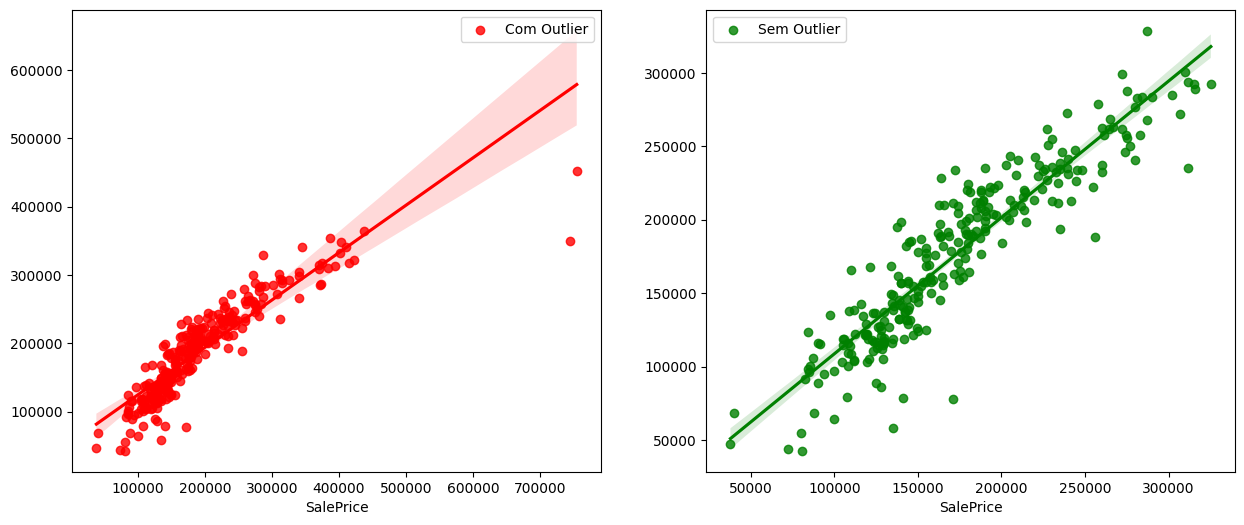

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.regplot(x=y_esperado, y=y_previsto, label='Com Outlier', ax=ax[0], color='red');
sns.regplot(x=y_esperado_sem_outlier, y=y_previsto_sem_outlier, label='Sem Outlier', ax=ax[1], color='green');
ax[0].legend();
ax[1].legend();

print('RMSE COM outliers:', rmse)
print('RMSE SEM outliers:', rmse_sem_outliers)

### RMSLE

*Root Mean Squared Logarithmic Error*

*Raiz Quadrado do Erro Logarítmico Médio*

- Aproximação do erro percentual
- `RMSE` se importa mais com a diferença simples, enquanto o `RMSLE` se importa com a diferença relativa (logs).
- É mais robusta a outliers


In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
print('RMSE Cenário 1:', mean_squared_error([1000], [600], squared=False))
print('RMSLE Cenário 1:', mean_squared_log_error([1000], [600], squared=False))

RMSE Cenário 1: 400.0
RMSLE Cenário 1: 0.5101598447800129


In [ ]:
print('RMSE Cenário 2:', mean_squared_error([1000], [1400], squared=False))
print('RMSLE Cenário 2:', mean_squared_log_error([1000], [1401], squared=False))

RMSE Cenário 2: 400.0
RMSLE Cenário 2: 0.33690028827931506


In [ ]:
rmsle = mean_squared_log_error(y_esperado, y_previsto, squared=False)
rmsle_sem_outlier = mean_squared_log_error(y_esperado_sem_outlier, y_previsto_sem_outlier, squared=False)

print('RMSLE COM outliers:', rmsle)
print('RMSLE SEM outliers:', rmsle_sem_outlier)

RMSLE COM outliers: 0.17412500801857447
RMSLE SEM outliers: 0.1641513668305472


### Max Error

- A métrica Max Error é o pior caso de erro entre o valor esperado e o valor previsto.
- O melhor valor para essa métrica é 0.


In [ ]:
from sklearn.metrics import max_error

maximo_error = max_error(y_esperado, y_previsto)
maximo_error_sem_outliers = max_error(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('Max Error COM outliers:', maximo_error)
print('Max Error SEM outliers:', maximo_error_sem_outliers)

Max Error COM outliers: 394697.54850610544
Max Error SEM outliers: 92968.0791883518


### MedAE - Median Absolute Error

*Median Absolute Error*

*Erro Mediano Absoluto*

In [ ]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y_esperado, y_previsto)
medae_sem_outlier = median_absolute_error(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('MedAE COM outliers:', medae)
print('MedAE SEM outliers:', medae_sem_outlier)

MedAE COM outliers: 15166.28401210883
MedAE SEM outliers: 13878.23073516709


### MAPE

*Mean Absolute Percent Error*

*Erro Médio Absoluto Percentual*

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_esperado, y_previsto)
mape_sem_outlier = mean_absolute_percentage_error(y_esperado_sem_outlier, y_previsto_sem_outlier)


print('MAPE COM Outlier:', mape)
print('MAPE SEM Outlier:', mape_sem_outlier)

MAPE COM Outlier: 0.1183328909706541
MAPE SEM Outlier: 0.11261754414788433


Erramos em média 11.8%.